<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings

warnings.filterwarnings('ignore', module='seaborn')
%matplotlib inline

#### 1.1 Load Data

In [20]:
# Read CSV
wine_csv = '../../DATA/winequality_merged.csv'
df = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [21]:
# ANSWER

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [24]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


In [25]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


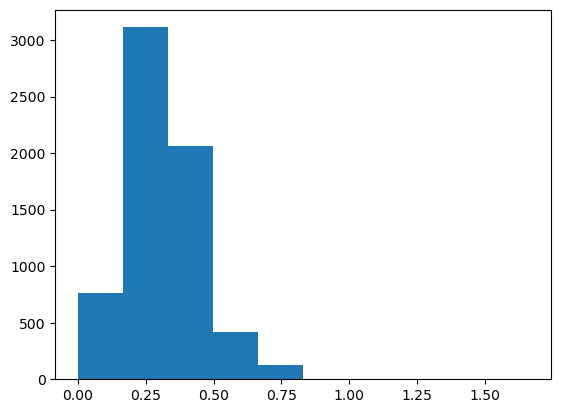

In [27]:
plt.hist(df['citric acid'])
plt.show()

### 2. Set Target Variable

Create a target variable for wine quality.

In [28]:
# Target Variable

# The target variable is "quality". 

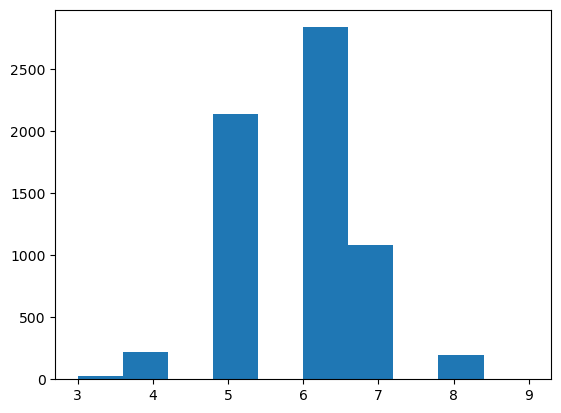

In [29]:
plt.hist(df['quality'])
plt.show()

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [30]:
# ANSWER

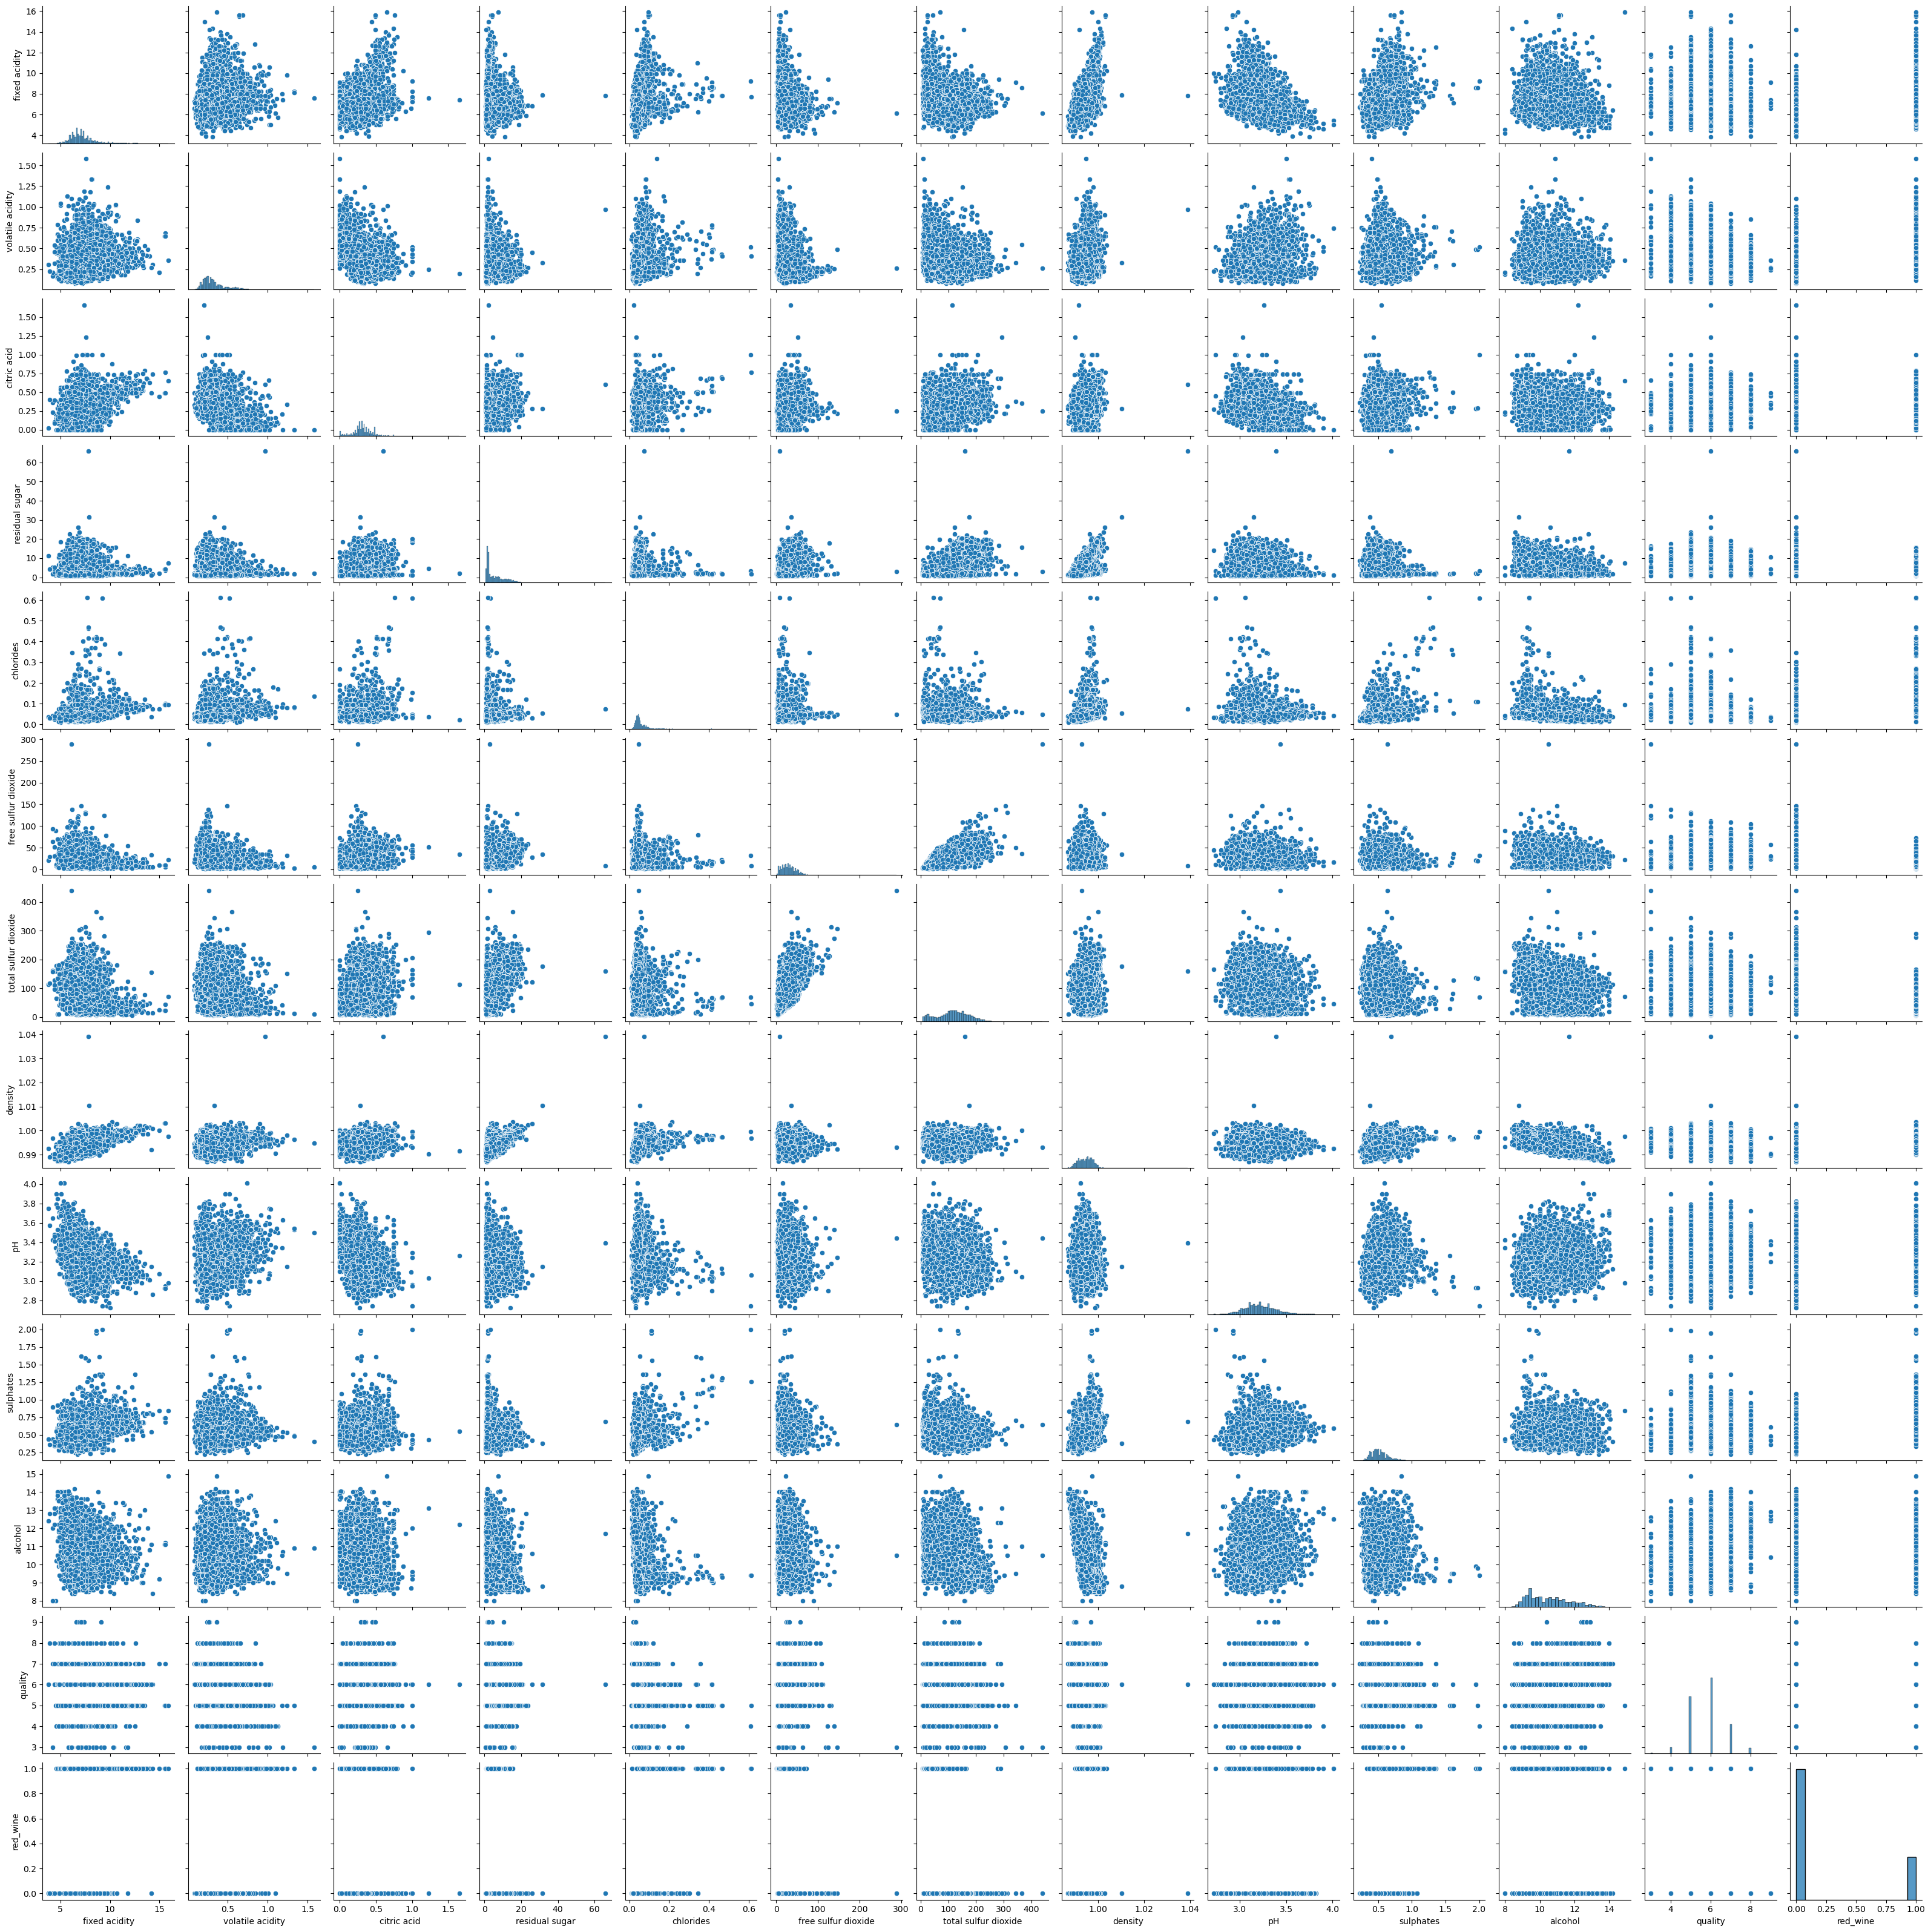

In [31]:
sns.pairplot(df)

In [32]:
corr_matrix = df.corr()
quality_sorted = corr_matrix['quality'].sort_values(ascending=False)
print(quality_sorted)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
red_wine               -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [33]:
# The following are the best predictors based on their correlation values. 

df_independent_vars = df[['alcohol', 'density', 'volatile acidity', 'chlorides']]

### 4. Using Linear Regression Create a Model and Test Score

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
# Train-Test Split

X = df_independent_vars
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(1300, 4)
(1300,)
(5197, 4)
(5197,)


In [44]:
# Create a model for Linear Regression

model = LinearRegression()

# Fit the model with the Training data

model.fit(X_train, y_train)

print("The model is: y = " + str(model.intercept_) + " + " + str(model.coef_[0]) + " * x1" + " + " + str(model.coef_[1]) + " * x2"
     + " + " + str(model.coef_[2]) + " * x3" + " + " + str(model.coef_[3]) + " * x4")

# Calculate the score (R^2 for Regression) for Training Data

r2_train = model.score(X_train, y_train)

# Calculate the score (R^2 for Regression) for Testing Data

r2_test = model.score(X_test, y_test)

print("R-squared for training data : " + str(r2_train))
print("R-squared for test data : " + str(r2_test))

The model is: y = -38.39531946161805 + 0.39187742104152923 * x1 + 40.83297487442832 * x2 + -1.512504011179821 * x3 + -0.0824374744420856 * x4
R-squared for training data : 0.2707886547599644
R-squared for test data : 0.2521354751304963


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [51]:
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds, squared=True)
print("Mean Squared Error : " + str(mse))
print("Residuals : " + str((y_test - y_preds).sum()))

Mean Squared Error : 0.5523329109637408
Residuals : 26.898507510502306


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [39]:
print(y_test.shape)
print(y_preds.shape)

(1300,)
(1300,)


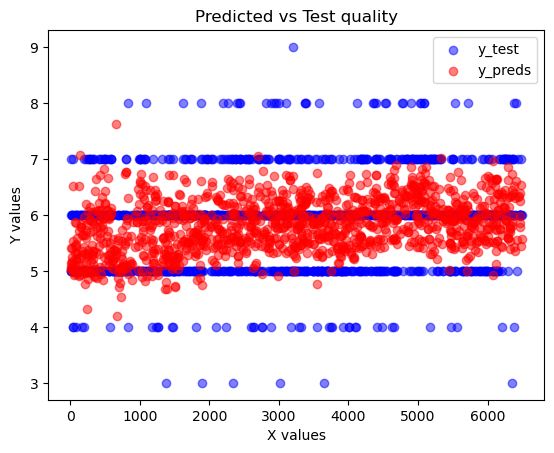

In [40]:
plt.scatter(X_test.index, y_test, color='blue', label='y_test', alpha=0.5)
plt.scatter(X_test.index, y_preds, color='red', label='y_preds', alpha=0.5)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Predicted vs Test quality')
plt.legend()
plt.show()

## BONUS: Cross validation

In [52]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [59]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    # Fit model with training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions with training and test set
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(r2_score(y_train, y_train_preds))
    test_scores.append(r2_score(y_test, y_test_preds))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_preds)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_preds)))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({
    'train_scores': train_scores,
    'test_scores': test_scores,
    'train_rmse': train_rmse,
    'test_rmse': test_rmse
})

print(metrics_df)

   train_scores  test_scores  train_rmse  test_rmse
0      0.265112     0.276115    0.753077   0.724312
1      0.272181     0.247868    0.744031   0.760895
2      0.273837     0.240266    0.745329   0.755817
3      0.266008     0.272375    0.745187   0.756290
4      0.259982     0.295546    0.749123   0.740604


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [ ]:
# Describe the metrics

# The metrics indicate that the model is not very good at predicting the quality of the wine based on the
# variables used. 

# The scores are low, which means that the model does not accurately explain the variance in the wine quality observations.

# The RMSE are high in relation to the wine quality observations, indicating that the model does not fit the data well. 

In [60]:
y_train.mean()

5.814351673720662

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



